In [2]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print('done')

done


In [5]:
#Load the dataset
df=pd.read_csv(r"C:\Users\Aakanksha\Downloads\laptop_data.csv")
df.head(1)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832


In [ ]:
#Begineer Level(basic data understanding)

In [5]:
#1.Unique laptop companies
# 1. Count unique companies
unique_companies = df['Company'].nunique()

# 2. Company with highest number of laptops
top_company = df['Company'].value_counts().idxmax()
top_count = df['Company'].value_counts().max()

print("Total unique companies:", unique_companies)
print(f"Company with most laptops: {top_company} ({top_count} models)")

Total unique companies: 19
Company with most laptops: Dell (297 models)


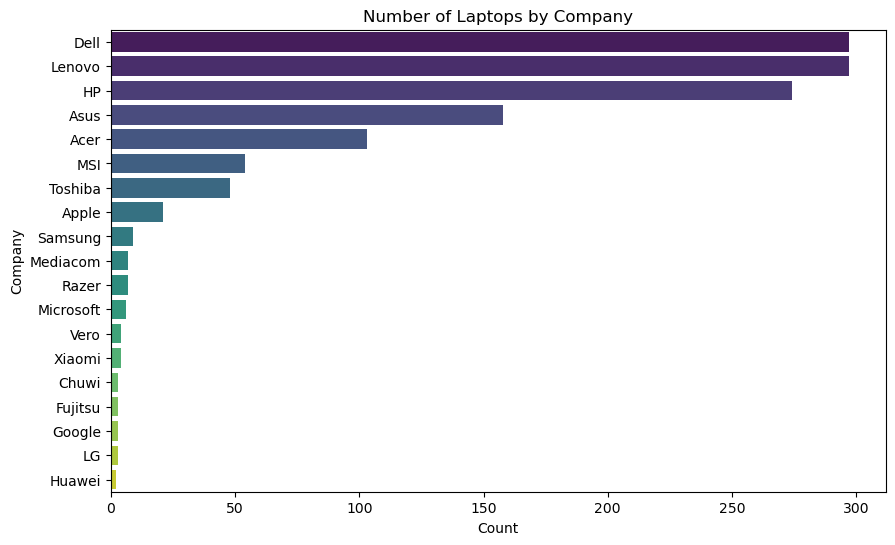

In [6]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='Company', order=df['Company'].value_counts().index, palette="viridis")
plt.title("Number of Laptops by Company")
plt.xlabel("Count")
plt.ylabel("Company")
plt.show()

In [7]:
#2.Average price by company
# Average price of laptops by company
avg_price_per_company = df.groupby('Company')['Price'].mean().sort_values(ascending=False)

print("Average Price of Laptops by Company:\n")
print(avg_price_per_company)

Average Price of Laptops by Company:

Company
Razer        178282.491429
LG           111834.720000
MSI           92116.226133
Google        89386.080000
Microsoft     85903.788000
Apple         83340.499886
Huawei        75870.720000
Samsung       75308.320000
Toshiba       67549.050000
Dell          63193.755782
Xiaomi        60390.882000
Asus          58830.143878
Lenovo        57882.563200
HP            56891.044222
Fujitsu       38841.120000
Acer          33394.615969
Chuwi         16745.726400
Mediacom      15717.600000
Vero          11584.404000
Name: Price, dtype: float64


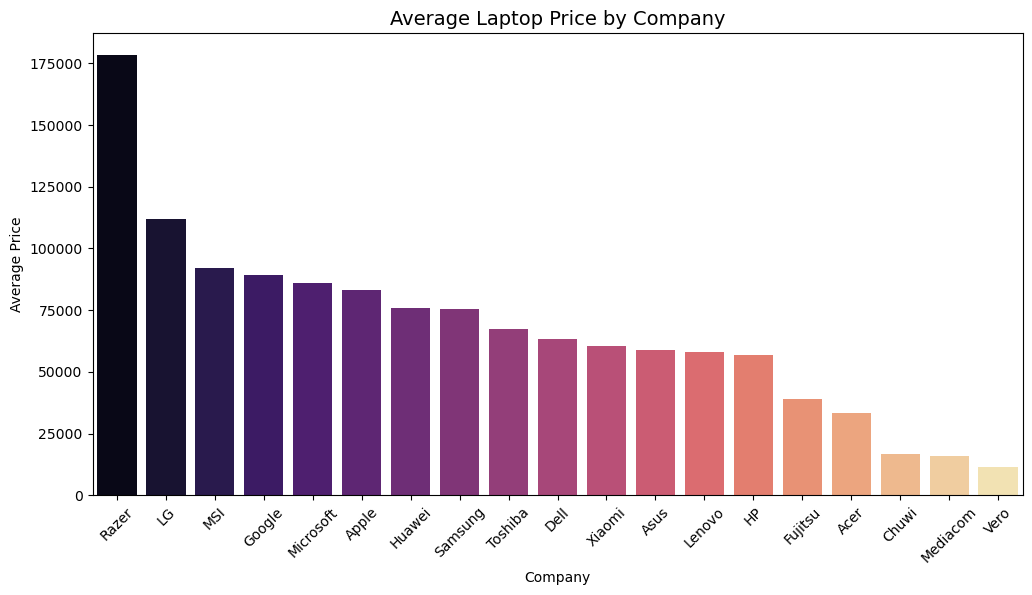

In [8]:
plt.figure(figsize=(12,6))
sns.barplot(x=avg_price_per_company.index, y=avg_price_per_company.values, palette="magma")
plt.title("Average Laptop Price by Company", fontsize=14)
plt.xlabel("Company")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()

In [9]:
#3.Most common laptop type
# Most common laptop type
most_common_type = df['TypeName'].value_counts().idxmax()
count_common_type = df['TypeName'].value_counts().max()

# Average price of that type
avg_price_common_type = df[df['TypeName'] == most_common_type]['Price'].mean()

print(f"Most common laptop type: {most_common_type} ({count_common_type} models)")
print(f"Average price of {most_common_type}: {avg_price_common_type:.2f}")

Most common laptop type: Notebook (727 models)
Average price of Notebook: 41669.15


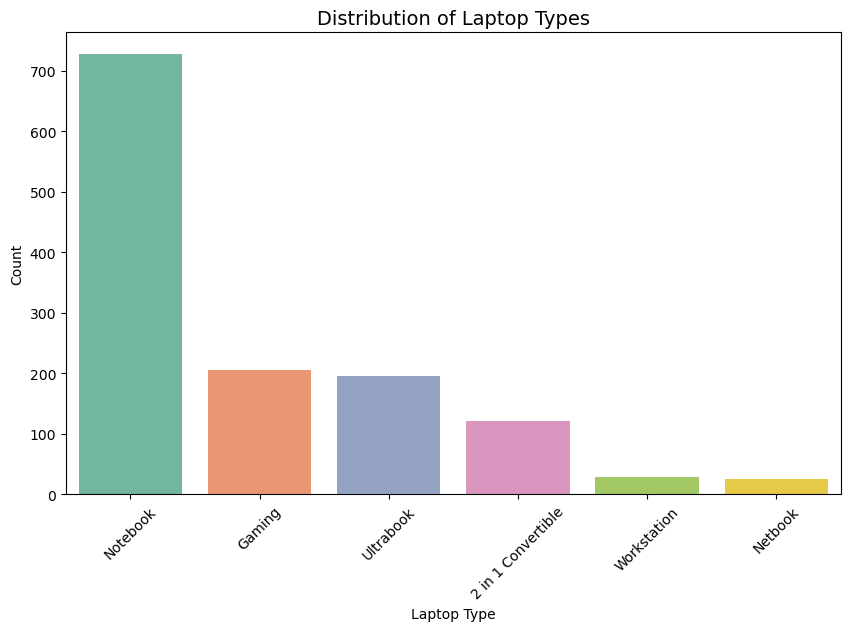

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='TypeName', order=df['TypeName'].value_counts().index, palette="Set2")
plt.title("Distribution of Laptop Types", fontsize=14)
plt.xlabel("Laptop Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Most common screen size: 15.6 inches


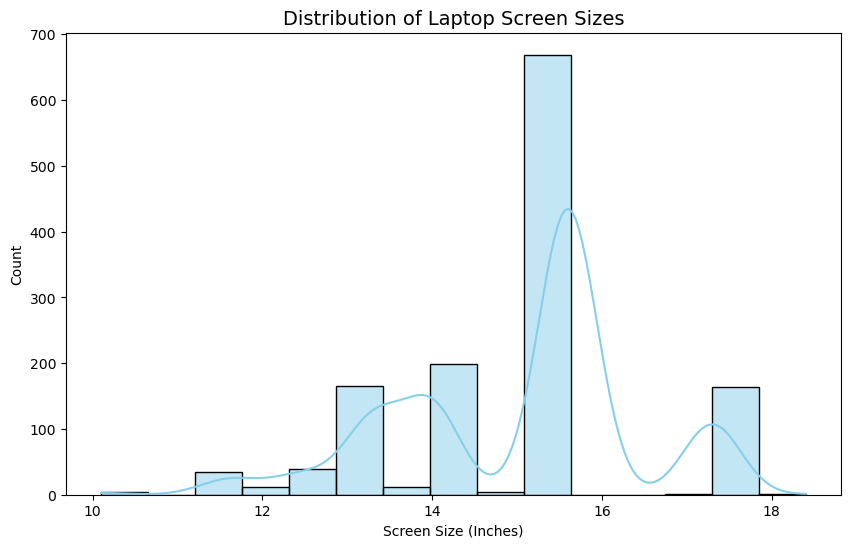

In [11]:
#4.Screen size portability
# Most common screen size
common_size = df['Inches'].mode()[0]
print(f"Most common screen size: {common_size} inches")

# Distribution plot
plt.figure(figsize=(10,6))
sns.histplot(df['Inches'], bins=15, kde=True, color="skyblue")
plt.title("Distribution of Laptop Screen Sizes", fontsize=14)
plt.xlabel("Screen Size (Inches)")
plt.ylabel("Count")
plt.show()

Average laptop weight: 2.04 kg
Lightest laptop: 0.69 kg
Heaviest laptop: 4.7 kg


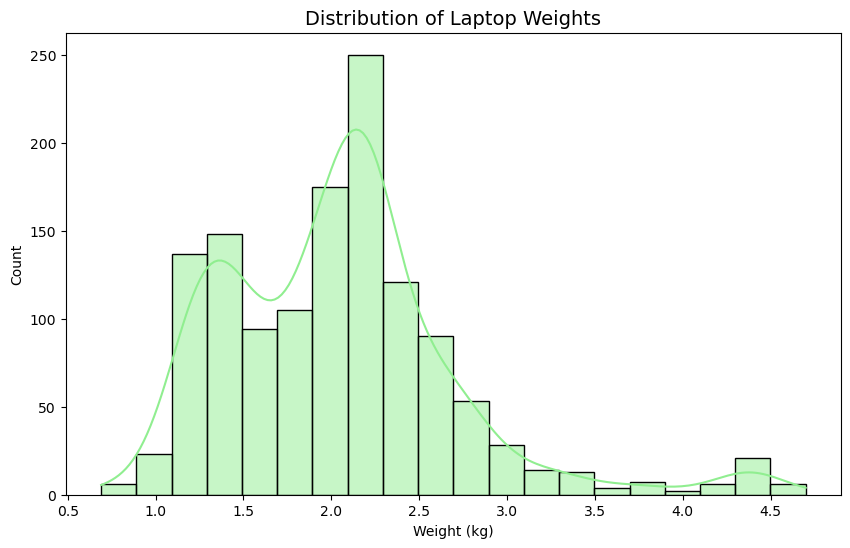

In [14]:
#5.Weight vs portability
# Clean Weight column: remove "kg" and convert to float
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)


# Average weight
avg_weight = df['Weight'].mean()

# Lightest and heaviest laptops
lightest = df['Weight'].min()
heaviest = df['Weight'].max()

print(f"Average laptop weight: {avg_weight:.2f} kg")
print(f"Lightest laptop: {lightest} kg")
print(f"Heaviest laptop: {heaviest} kg")

# Distribution plot
plt.figure(figsize=(10,6))
sns.histplot(df['Weight'], bins=20, kde=True, color="lightgreen")
plt.title("Distribution of Laptop Weights", fontsize=14)
plt.xlabel("Weight (kg)")
plt.ylabel("Count")
plt.show()

In [ ]:
# Intermediate Level (compartive insights)

Average Laptop Price by Operating System:

OpSys
macOS           93220.327385
Windows 7       89864.783040
Windows 10 S    68543.654400
Mac OS X        67285.780200
Windows 10      62238.471367
Linux           32877.429445
No OS           31327.219200
Chrome OS       29495.018667
Android         23123.520000
Name: Price, dtype: float64


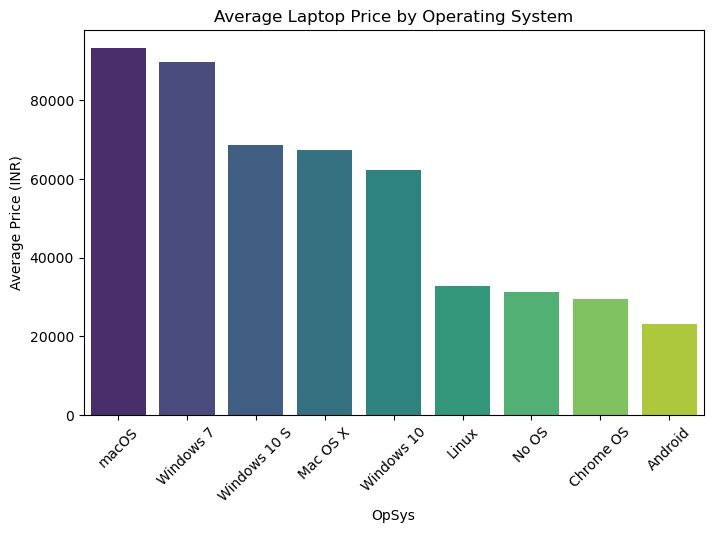

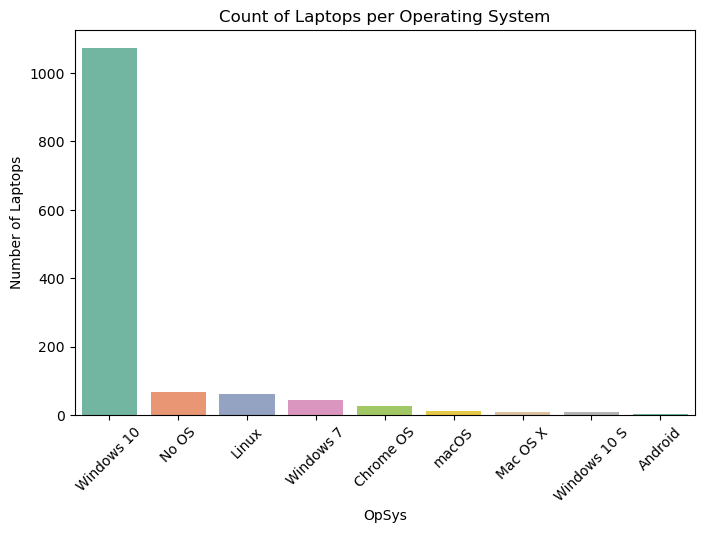

In [17]:
#1.OS vs price
# Average Price by OS
os_price = df.groupby("OpSys")["Price"].mean().sort_values(ascending=False)

print("Average Laptop Price by Operating System:\n")
print(os_price)

# Plot Average Price
plt.figure(figsize=(8,5))
sns.barplot(x=os_price.index, y=os_price.values, palette="viridis")
plt.xticks(rotation=45)
plt.ylabel("Average Price (INR)")
plt.title("Average Laptop Price by Operating System")
plt.show()

# Count of laptops by OS
plt.figure(figsize=(8,5))
sns.countplot(x="OpSys", data=df, palette="Set2", order=df["OpSys"].value_counts().index)
plt.xticks(rotation=45)
plt.ylabel("Number of Laptops")
plt.title("Count of Laptops per Operating System")
plt.show()

In [ ]:
#The analysis shows that Mac OS laptops have the highest average price, followed by Windows 10/11 models.

#Linux and Chrome OS laptops are relatively cheaper compared to others.

#In terms of count, Windows laptops dominate the dataset, indicating that they have the largest market share, while Mac and Linux laptops are fewer but more expensive on average.

#This suggests that Apple positions itself in the premium market, whereas Windows dominates with a wide range of price points

Average Laptop Price by RAM size:

Ram
2GB      13552.857818
4GB      30613.221734
6GB      32778.193873
8GB      62913.713455
12GB     66037.277952
16GB    103191.166872
24GB    117553.440000
32GB    181849.215812
64GB    211788.000000
Name: Price, dtype: float64


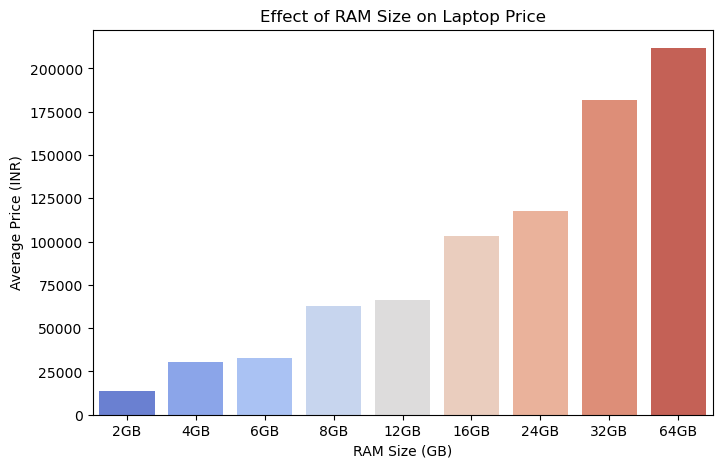

In [19]:
# Q2: RAM vs Price

# Group by RAM and calculate average price
ram_price = df.groupby("Ram")["Price"].mean().sort_values()

print("Average Laptop Price by RAM size:\n")
print(ram_price)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=ram_price.index, y=ram_price.values, palette="coolwarm")
plt.xlabel("RAM Size (GB)")
plt.ylabel("Average Price (INR)")
plt.title("Effect of RAM Size on Laptop Price")
plt.show()

In [ ]:
#The results show a direct relationship between RAM and laptop price.
#Laptops with higher RAM (16GB, 32GB) have much higher average prices compared to those with lower RAM (4GB, 8GB).
#This indicates that RAM size is one of the most important factors influencing laptop cost, as consumers are willing to pay more for better multitasking and performance.

Price summary by Screen Resolution:
   ResolutionCategory  count           mean     median           std
2                 HD    308   29109.976036   24988.32  14405.264813
1            Full HD    846   64950.715081   58554.72  32663.174574
3              Other     65   68793.726129   63882.72  35538.397064
4                QHD     39  100459.562954  103523.04  30358.020890
0                 4K     45  126821.626240  111834.72  56502.018943


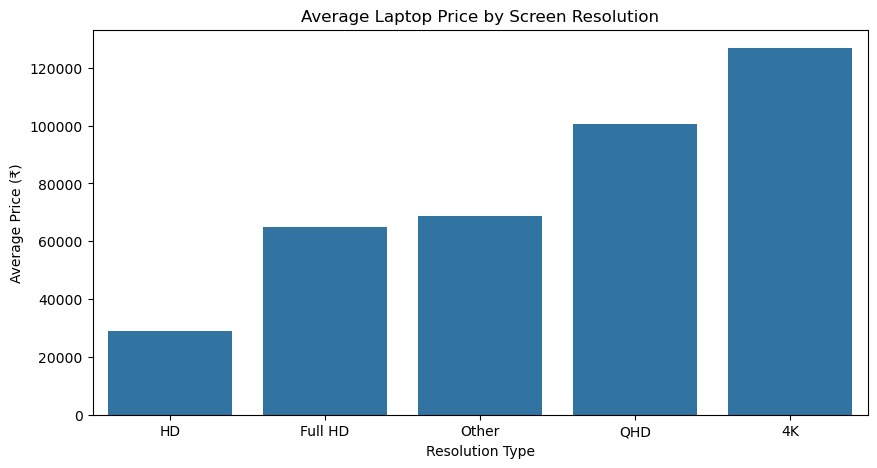

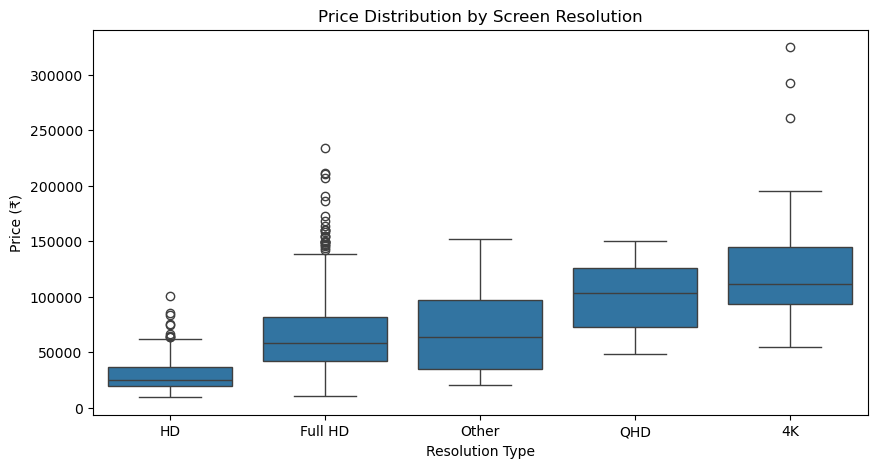

ANOVA: F=155.246, p=0.0000


In [31]:
# Q3 Extended: Effect of Screen Resolution on Laptop Price
from scipy import stats

# Clean Price column
df['Price'] = df['Price'].astype(str).str.replace(',','').str.replace(r'[^\d.]','',regex=True).astype(float)

# Step 1: Simplify ScreenResolution
# Example values: "1920x1080", "1366x768", "3840x2160", etc.
# Let's categorize them into common types
def categorize_resolution(res):
    res = str(res)
    if "3840" in res or "2160" in res:   # 3840x2160 = 4K
        return "4K"
    elif "2560" in res or "1440" in res: # 2560x1440 = QHD
        return "QHD"
    elif "1920" in res or "1080" in res: # 1920x1080 = Full HD
        return "Full HD"
    elif "1366" in res or "768" in res:  # 1366x768 = HD
        return "HD"
    else:
        return "Other"

df['ResolutionCategory'] = df['ScreenResolution'].apply(categorize_resolution)

# Step 2: Group by resolution
grouped = df.groupby('ResolutionCategory')['Price'].agg(['count','mean','median','std']).reset_index().sort_values('mean')
print("Price summary by Screen Resolution:\n", grouped)

# Step 3: Visualization
plt.figure(figsize=(10,5))
sns.barplot(x='ResolutionCategory', y='Price', data=df, ci=None, order=grouped['ResolutionCategory'])
plt.title('Average Laptop Price by Screen Resolution')
plt.ylabel("Average Price (₹)")
plt.xlabel("Resolution Type")
plt.show()

# Boxplot for spread
plt.figure(figsize=(10,5))
sns.boxplot(x='ResolutionCategory', y='Price', data=df, order=grouped['ResolutionCategory'])
plt.title('Price Distribution by Screen Resolution')
plt.ylabel("Price (₹)")
plt.xlabel("Resolution Type")
plt.show()

# Step 4: Statistical test (ANOVA across multiple groups)
groups = [grp['Price'].values for name, grp in df.groupby('ResolutionCategory')]
f_stat, p_val = stats.f_oneway(*groups)
print(f"ANOVA: F={f_stat:.3f}, p={p_val:.4f}")


CPU Brand Market Share and Pricing:
            Count  Market Share %  Average Price
CPU_Brand                                      
Intel       1240           95.17       61389.97
AMD           62            4.76       29870.84
Samsung        1            0.08       35111.52


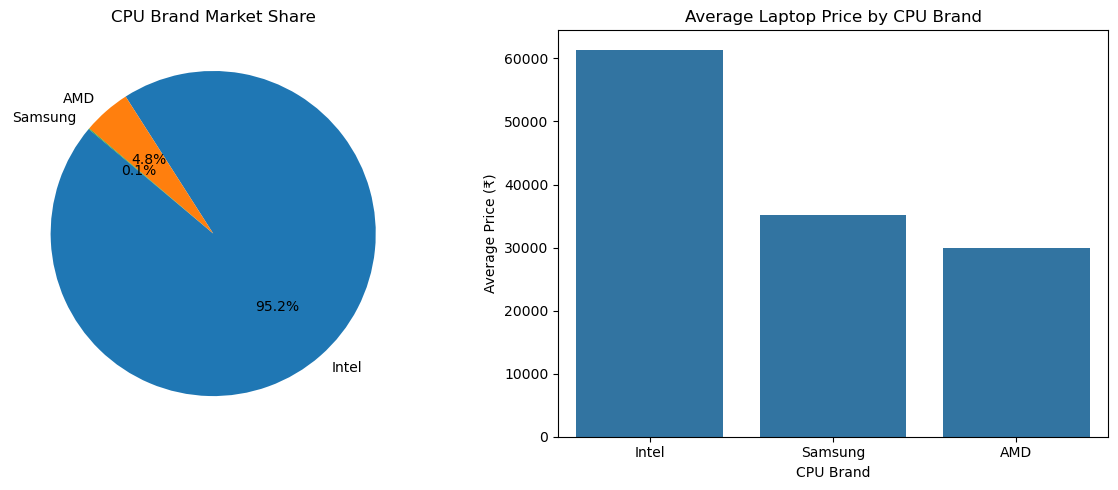

In [32]:
# Q4: CPU Brands Market Share and Pricing


# Clean Price column
df['Price'] = df['Price'].astype(str).str.replace(',','').str.replace(r'[^\d.]','',regex=True).astype(float)

# Step 1: Extract CPU brand
# Cpu column usually looks like: "Intel Core i5 7200U", "AMD Ryzen 5", etc.
df['CPU_Brand'] = df['Cpu'].str.split().str[0]   # take the first word (Intel, AMD, Samsung, etc.)

# Step 2: Market share (count of laptops per brand)
cpu_counts = df['CPU_Brand'].value_counts()
cpu_share = (cpu_counts / len(df)) * 100

# Step 3: Average price per CPU brand
avg_price = df.groupby('CPU_Brand')['Price'].mean().sort_values(ascending=False)

# Step 4: Combine into one summary table
summary = pd.DataFrame({
    'Count': cpu_counts,
    'Market Share %': cpu_share.round(2),
    'Average Price': df.groupby('CPU_Brand')['Price'].mean().round(2)
}).sort_values('Count', ascending=False)

print("CPU Brand Market Share and Pricing:\n", summary)

# Step 5: Visualizations
plt.figure(figsize=(12,5))

# Pie chart for market share
plt.subplot(1,2,1)
plt.pie(cpu_counts, labels=cpu_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("CPU Brand Market Share")

# Bar chart for average price
plt.subplot(1,2,2)
sns.barplot(x=avg_price.index, y=avg_price.values)
plt.title("Average Laptop Price by CPU Brand")
plt.ylabel("Average Price (₹)")
plt.xlabel("CPU Brand")

plt.tight_layout()
plt.show()


In [36]:
# Q5: Top 5 Most Expensive Laptop Models and Common Features

# Clean Price column
df['Price'] = df['Price'].astype(str).str.replace(',','').str.replace(r'[^\d.]','',regex=True).astype(float)

# Step 1: Top 5 most expensive laptops
top5 = df.sort_values(by="Price", ascending=False).head(5)

# Display neat table of top 5
top5_table = top5[['Company','Price','Cpu','Ram','Memory','Gpu','ScreenResolution']]
print("=== Top 5 Most Expensive Laptops ===")
print(top5_table.to_string(index=False))

# Step 2: Common features summary
common_features = pd.DataFrame({
    "Count": [
        top5['Company'].value_counts().to_dict(),
        top5['Cpu'].value_counts().to_dict(),
        top5['Ram'].value_counts().to_dict(),
        top5['Memory'].value_counts().to_dict(),
        top5['Gpu'].value_counts().to_dict(),
        top5['ScreenResolution'].value_counts().to_dict()
    ]
}, index=["Brands","CPU Types","RAM","Storage","GPU","Resolution"])

print("\n=== Common Features Among Top 5 ===")
print(common_features)


=== Top 5 Most Expensive Laptops ===
Company     Price                           Cpu  Ram    Memory                     Gpu                    ScreenResolution
  Razer 324954.72   Intel Core i7 7820HK 2.9GHz 32GB   1TB SSD Nvidia GeForce GTX 1080 4K Ultra HD / Touchscreen 3840x2160
  Razer 292986.72   Intel Core i7 7820HK 2.9GHz 32GB 512GB SSD Nvidia GeForce GTX 1080 4K Ultra HD / Touchscreen 3840x2160
 Lenovo 261018.72 Intel Xeon E3-1535M v6 3.1GHz 32GB   1TB SSD    Nvidia Quadro M2200M     IPS Panel 4K Ultra HD 3840x2160
     HP 233845.92 Intel Xeon E3-1535M v5 2.9GHz 16GB 256GB SSD    Nvidia Quadro M2000M         IPS Panel Full HD 1920x1080
   Asus 211788.00   Intel Core i7 6820HK 2.7GHz 64GB   1TB SSD Nvidia GeForce GTX 980          IPS Panel Full HD 1920x1080

=== Common Features Among Top 5 ===
                                                        Count
Brands          {'Razer': 2, 'Lenovo': 1, 'HP': 1, 'Asus': 1}
CPU Types   {'Intel Core i7 7820HK 2.9GHz': 2, 'Intel Xeon...
RA

In [ ]:
#Advanced Level(deeper analytics insights)

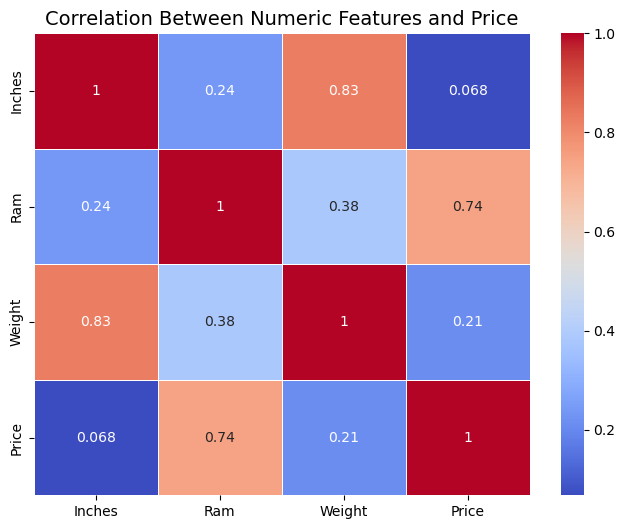

In [12]:
#Q1.Correlation with price
# Clean RAM column (remove 'GB' if present)
df['Ram'] = df['Ram'].astype(str).str.replace('GB', '').astype(float)

# Clean Weight column (remove 'kg' only if it exists, else just convert)
df['Weight'] = df['Weight'].astype(str).str.replace('kg', '').astype(float)

# Select numeric columns
numeric_cols = ['Inches', 'Ram', 'Weight', 'Price']

# Correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Numeric Features and Price", fontsize=14)
plt.show()

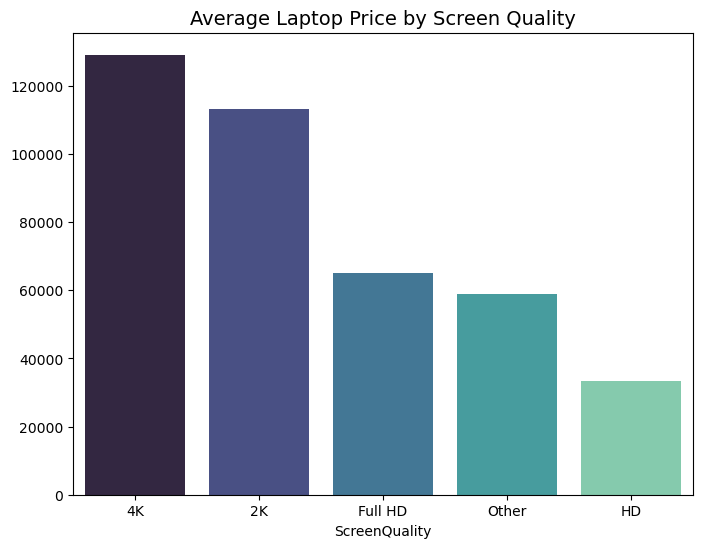

In [16]:
#Q2. screen Quality vs price
# Feature engineering: Create Screen Quality column
def categorize_resolution(x):
    x = str(x)
    if "4K" in x or "3840" in x:
        return "4K"
    elif "2560" in x or "2K" in x:
        return "2K"
    elif "1920" in x or "Full HD" in x:
        return "Full HD"
    elif "1366" in x or "HD" in x:
        return "HD"
    else:
        return "Other"

df["ScreenQuality"] = df["ScreenResolution"].apply(categorize_resolution)

# Group by Screen Quality and get average prices
avg_price_quality = df.groupby("ScreenQuality")["Price"].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x=avg_price_quality.index, y=avg_price_quality.values, palette="mako")
plt.title("Average Laptop Price by Screen Quality", fontsize=14)
plt.show()

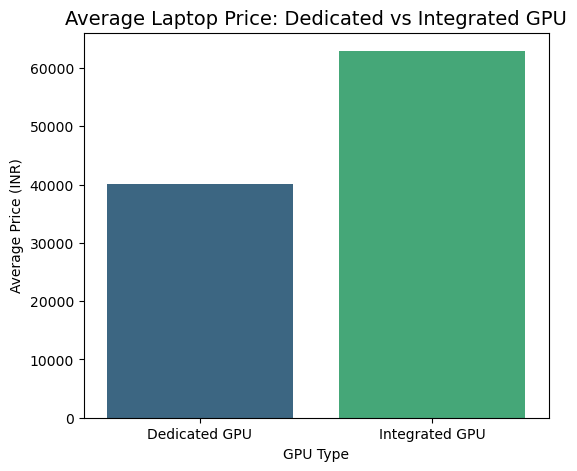

GPU_Type
Dedicated GPU     40104.311806
Integrated GPU    62896.123867
Name: Price, dtype: float64


In [18]:
#Q3. Gaming vs Non-Gaming
# Function to classify GPU type
def classify_gpu(x):
    x = str(x)
    # Common dedicated GPUs
    if "NVIDIA" in x or "AMD Radeon" in x:
        return "Dedicated GPU"
    else:
        return "Integrated GPU"

# Apply classification
df["GPU_Type"] = df["Gpu"].apply(classify_gpu)

# Group by GPU type and calculate average price
avg_gpu_price = df.groupby("GPU_Type")["Price"].mean()

# Plot
plt.figure(figsize=(6,5))
sns.barplot(x=avg_gpu_price.index, y=avg_gpu_price.values, palette="viridis")
plt.title("Average Laptop Price: Dedicated vs Integrated GPU", fontsize=14)
plt.ylabel("Average Price (INR)")
plt.xlabel("GPU Type")
plt.show()

print(avg_gpu_price)

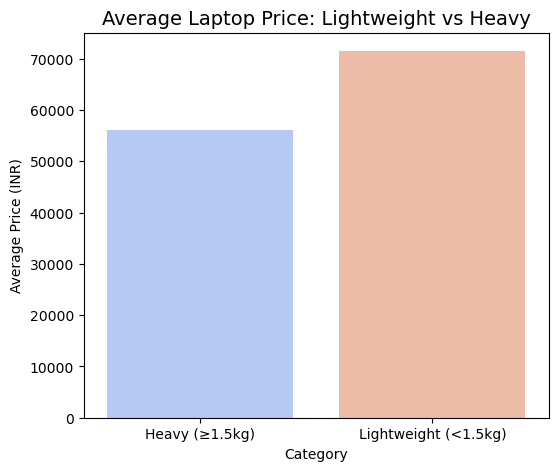

Weight_Category
Heavy (≥1.5kg)          56175.785239
Lightweight (<1.5kg)    71505.778059
Name: Price, dtype: float64
T-statistic: 6.842965708445056
P-value: 1.9686425502152624e-11


In [24]:
#Q4. Lightweight vs Heavyweight
from scipy import stats

# Ensure Weight column is string before .str operations
df["Weight"] = df["Weight"].astype(str).str.replace("kg", "").astype(float)

# Create new column: Lightweight vs Heavy
df["Weight_Category"] = df["Weight"].apply(lambda x: "Lightweight (<1.5kg)" if x < 1.5 else "Heavy (≥1.5kg)")

# Group by category and calculate average price
avg_weight_price = df.groupby("Weight_Category")["Price"].mean()

# Plot
plt.figure(figsize=(6,5))
sns.barplot(x=avg_weight_price.index, y=avg_weight_price.values, palette="coolwarm")
plt.title("Average Laptop Price: Lightweight vs Heavy", fontsize=14)
plt.ylabel("Average Price (INR)")
plt.xlabel("Category")
plt.show()

print(avg_weight_price)

# Hypothesis test (independent t-test)
light = df[df["Weight_Category"]=="Lightweight (<1.5kg)"]["Price"]
heavy = df[df["Weight_Category"]=="Heavy (≥1.5kg)"]["Price"]

t_stat, p_val = stats.ttest_ind(light, heavy, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_val)


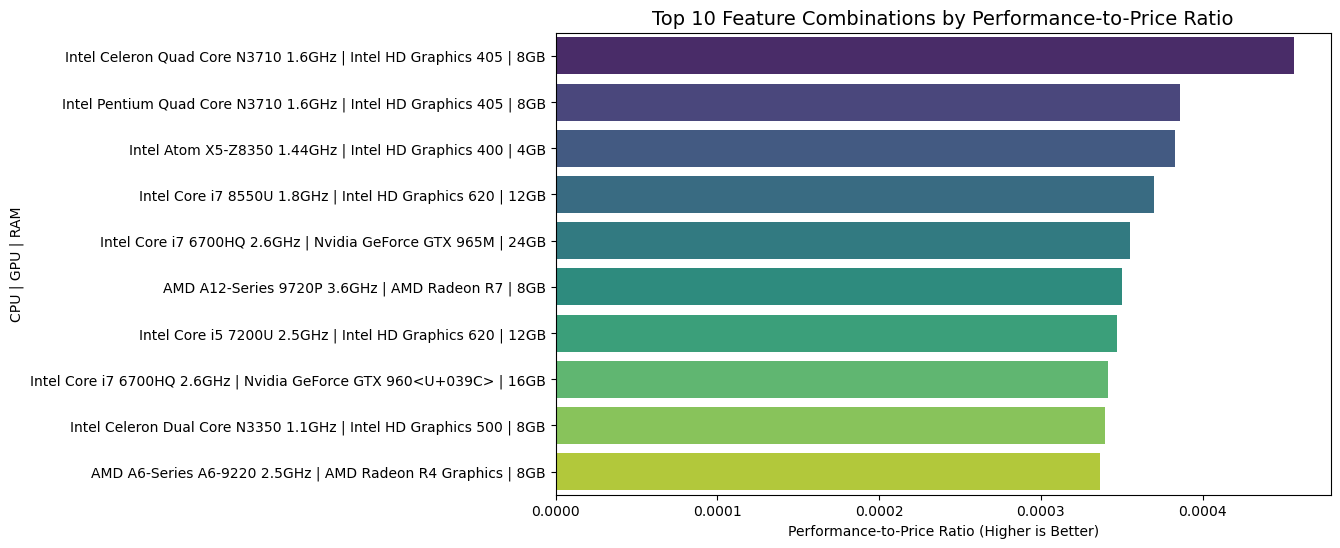

                                         Feature_Combo  Perf_Price_Ratio
70   Intel Celeron Quad Core N3710 1.6GHz | Intel H...          0.000456
388  Intel Pentium Quad Core N3710 1.6GHz | Intel H...          0.000386
46   Intel Atom X5-Z8350 1.44GHz | Intel HD Graphic...          0.000383
367  Intel Core i7 8550U 1.8GHz | Intel HD Graphics...          0.000370
257  Intel Core i7 6700HQ 2.6GHz | Nvidia GeForce G...          0.000355
11   AMD A12-Series 9720P 3.6GHz | AMD Radeon R7 | 8GB          0.000350
161  Intel Core i5 7200U 2.5GHz | Intel HD Graphics...          0.000347
251  Intel Core i7 6700HQ 2.6GHz | Nvidia GeForce G...          0.000342
64   Intel Celeron Dual Core N3350 1.1GHz | Intel H...          0.000340
21   AMD A6-Series A6-9220 2.5GHz | AMD Radeon R4 G...          0.000337


In [25]:
#Q5. Best feature combination
# --- Step 1: Clean RAM column ---
df["Ram"] = (
    df["Ram"]
    .astype(str)                      # make sure it's string
    .str.replace("GB", "", regex=False)  # remove "GB"
    .str.strip()                      # remove spaces
    .astype(float)                    # handle "8.0"
    .astype(int)                      # convert to int (8, 16, etc.)
)

# --- Step 2: Create Feature Combination (CPU + GPU + RAM) ---
df["Feature_Combo"] = (
    df["Cpu"].astype(str) 
    + " | " 
    + df["Gpu"].astype(str) 
    + " | " 
    + df["Ram"].astype(str) + "GB"
)

# --- Step 3: Performance-to-Price Ratio (proxy = RAM / Price) ---
df["Perf_Price_Ratio"] = df["Ram"] / df["Price"]

# --- Step 4: Group by Feature Combo and compute average ratio ---
combo_ratio = df.groupby("Feature_Combo")["Perf_Price_Ratio"].mean().reset_index()

# --- Step 5: Sort top 10 combos ---
top_combos = combo_ratio.sort_values(by="Perf_Price_Ratio", ascending=False).head(10)

# --- Step 6: Plot ---
plt.figure(figsize=(10,6))
sns.barplot(
    y="Feature_Combo",
    x="Perf_Price_Ratio",
    data=top_combos,
    palette="viridis"
)
plt.title("Top 10 Feature Combinations by Performance-to-Price Ratio", fontsize=14)
plt.xlabel("Performance-to-Price Ratio (Higher is Better)")
plt.ylabel("CPU | GPU | RAM")
plt.show()

# Display table
print(top_combos)


In [ ]:
#Expert Level(Predictive & Strategic Analysis)


Best Params: {'rf__n_estimators': 300, 'rf__min_samples_split': 5, 'rf__max_depth': 10}
R² Score: 0.6572357989065171
RMSE: 22231.17366125659
MAE: 15439.03724359169


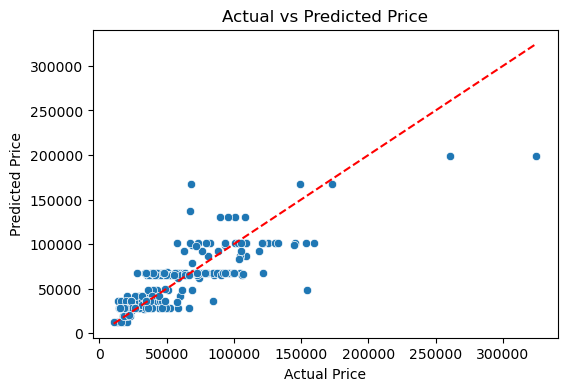

In [6]:
#Q1. Home brand advantages
# Laptop Price Prediction - Regression Model


from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


# Price → numeric
df["Price"] = df["Price"].astype(str).str.replace(",","").str.replace(r"[^\d.]","",regex=True).astype(float)

# RAM → numeric (remove "GB")
df["RamGB"] = df["Ram"].astype(str).str.replace("GB","",regex=False).str.strip()
df["RamGB"] = df["RamGB"].astype(float)

# Screen Resolution → simplify categories
def res_category(s):
    s = str(s)
    if "3840" in s or "2160" in s: return "4K"
    if "2560" in s or "1440" in s: return "QHD"
    if "1920" in s or "1080" in s: return "FHD"
    if "1366" in s or "768" in s: return "HD"
    return "Other"
df["Resolution"] = df["ScreenResolution"].apply(res_category)

# CPU brand
df["CPU_Brand"] = df["Cpu"].str.split().str[0]

# GPU brand
df["GPU_Brand"] = df["Gpu"].str.split().str[0]

# ============================
# 2. Select Features & Target
# ============================
features = ["RamGB", "CPU_Brand", "GPU_Brand", "Resolution"]
X = df[features]
y = df["Price"]

# ============================
# 3. Preprocessing
# ============================
num_features = ["RamGB"]
cat_features = ["CPU_Brand","GPU_Brand","Resolution"]

num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_features),
        ("cat", cat_transformer, cat_features)
    ])

# ============================
# 4. Build Model
# ============================
rf = RandomForestRegressor(random_state=42)

model = Pipeline(steps=[("pre", preprocessor),
                        ("rf", rf)])

# Hyperparameter tuning (quick search)
param_dist = {
    "rf__n_estimators": [100, 200, 300],
    "rf__max_depth": [10, 20, None],
    "rf__min_samples_split": [2, 5]
}

search = RandomizedSearchCV(model, param_dist, n_iter=5, 
                            scoring="r2", cv=3, n_jobs=-1, random_state=42)
search.fit(X, y)

best_model = search.best_estimator_

# ============================
# 5. Evaluate
# ============================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print("Best Params:", search.best_params_)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))

# Residual Plot
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.show()


dict_keys(['pre', 'rf'])
                  Feature  Importance
0              num__RamGB    0.860057
10     cat__Resolution_HD    0.033217
4      cat__GPU_Brand_AMD    0.031344
9     cat__Resolution_FHD    0.029100
8      cat__Resolution_4K    0.013037
12    cat__Resolution_QHD    0.011615
6    cat__GPU_Brand_Intel    0.008218
7   cat__GPU_Brand_Nvidia    0.004989
11  cat__Resolution_Other    0.004199
1      cat__CPU_Brand_AMD    0.002278


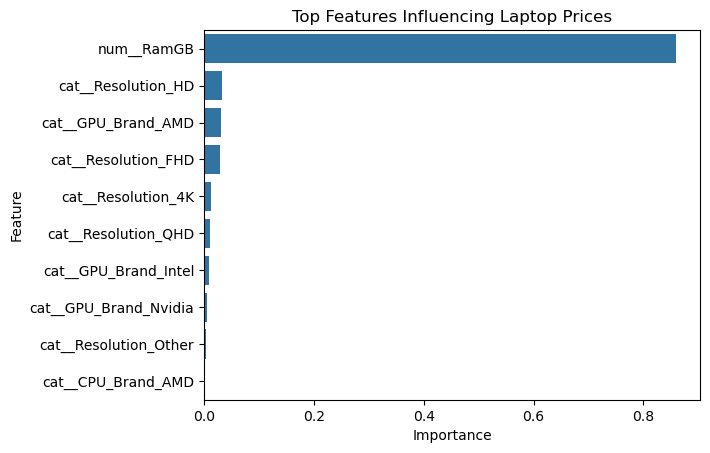

In [24]:
#2.Feature important analysis
# Get feature names directly from the ColumnTransformer
feature_names = best_model.named_steps["pre"].get_feature_names_out()

# Get model step (check keys first)
print(best_model.named_steps.keys())
model = best_model.named_steps["rf"]   # or "xgb"

# Now feature importances
importances = model.feature_importances_

# Build DataFrame safely
feat_imp = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Show top 10
print(feat_imp.head(10))

# Plot
sns.barplot(x="Importance", y="Feature", data=feat_imp.head(10))
plt.title("Top Features Influencing Laptop Prices")
plt.show()


             RamGB  Memory_Val  Weight_kg  Touchscreen          Price
Cluster                                                              
0        17.244444  383.027778   2.894056     0.022222  114225.553440
1         9.382979  410.234043   1.529516     1.000000   74238.934979
2         6.474866  449.913369   1.976461     0.000000   46516.734243


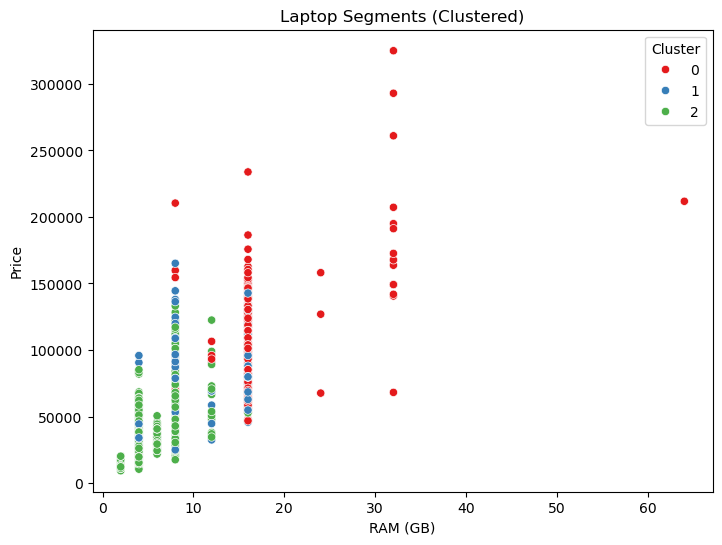

In [25]:
#Q3.cluster laptop into segments
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# ============================
# 1. Select features for clustering
# ============================
cluster_features = ["RamGB", "Memory_Val", "Weight_kg", "Touchscreen", "Price"]
X_cluster = df[cluster_features].copy()

# Fill any missing values
X_cluster = X_cluster.fillna(0)

# ============================
# 2. Scale features
# ============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# ============================
# 3. Apply KMeans (3 clusters: Budget, Mid-range, Premium)
# ============================
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# ============================
# 4. Analyze clusters
# ============================
cluster_summary = df.groupby("Cluster")[cluster_features].mean()
print(cluster_summary)

# ============================
# 5. Visualize clusters by Price & RAM
# ============================
plt.figure(figsize=(8,6))
sns.scatterplot(x="RamGB", y="Price", hue="Cluster", data=df, palette="Set1")
plt.title("Laptop Segments (Clustered)")
plt.xlabel("RAM (GB)")
plt.ylabel("Price")
plt.show()


In [26]:
#Q4. Recommend top specification
# --- Students: choose top 3 most common combos under 60k ---
students = df[df["Price"] < 60000]
student_specs = students.groupby(["CPU_Brand", "GPU_Brand", "RamGB"])["Price"].count().reset_index()
student_top3 = student_specs.sort_values(by="Price", ascending=False).head(3)

# --- Gamers: choose top 3 with dedicated GPUs ---
gamers = df[df["Gpu"].str.contains("Nvidia|AMD", case=False, na=False)]
gamer_specs = gamers.groupby(["CPU_Brand", "GPU_Brand", "RamGB"])["Price"].count().reset_index()
gamer_top3 = gamer_specs.sort_values(by="Price", ascending=False).head(3)

# --- Professionals: mid-high RAM + CPU focus ---
pros = df[df["RamGB"] >= 16]
pro_specs = pros.groupby(["CPU_Brand", "GPU_Brand", "RamGB"])["Price"].count().reset_index()
pro_top3 = pro_specs.sort_values(by="Price", ascending=False).head(3)

print("Top 3 Student Specs:\n", student_top3)
print("\nTop 3 Gamer Specs:\n", gamer_top3)
print("\nTop 3 Professional Specs:\n", pro_top3)


Top 3 Student Specs:
    CPU_Brand GPU_Brand  RamGB  Price
11     Intel     Intel    4.0    263
13     Intel     Intel    8.0    147
17     Intel    Nvidia    8.0    113

Top 3 Gamer Specs:
    CPU_Brand GPU_Brand  RamGB  Price
13     Intel    Nvidia    8.0    196
15     Intel    Nvidia   16.0    131
8      Intel       AMD    8.0     66

Top 3 Professional Specs:
   CPU_Brand GPU_Brand  RamGB  Price
5     Intel    Nvidia   16.0    131
2     Intel     Intel   16.0     52
7     Intel    Nvidia   32.0     16


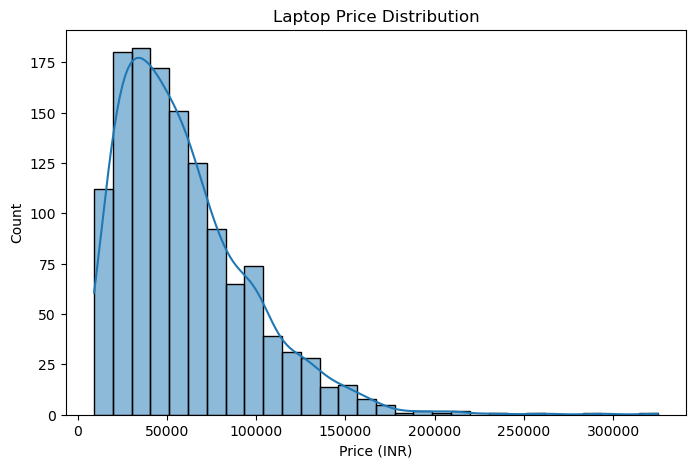

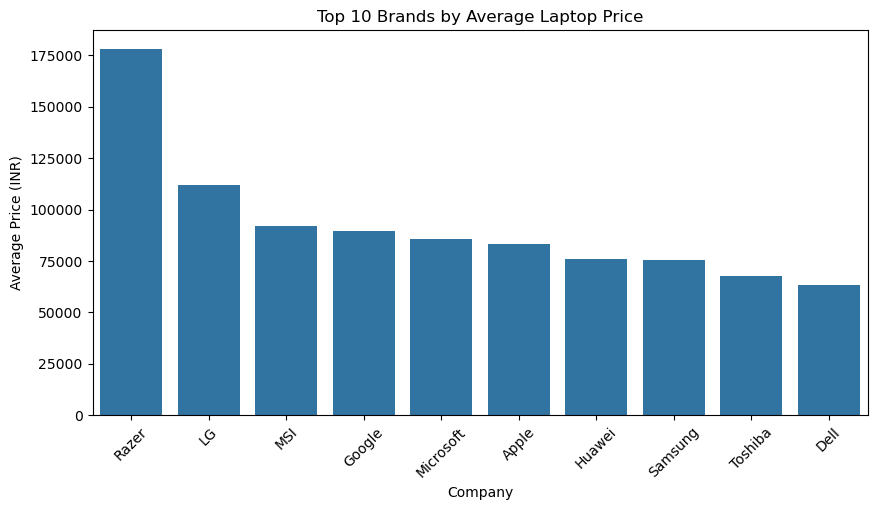

Average Price by GPU Type:
 GPU_Type
Dedicated     67570.640342
Integrated    53692.523532
Name: Price, dtype: float64


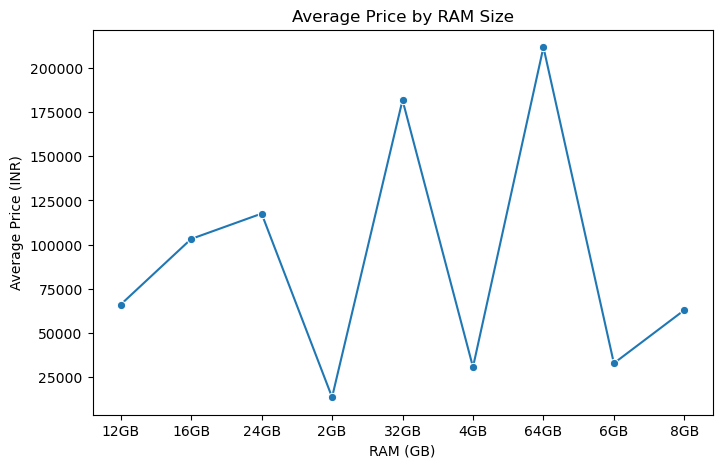

In [27]:
#5.pricing strategy for market
# 1. Distribution of Prices
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title("Laptop Price Distribution")
plt.xlabel("Price (INR)")
plt.ylabel("Count")
plt.show()

# 2. Average Price by Brand
avg_brand_price = df.groupby("Company")["Price"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=avg_brand_price.index, y=avg_brand_price.values)
plt.title("Top 10 Brands by Average Laptop Price")
plt.ylabel("Average Price (INR)")
plt.xticks(rotation=45)
plt.show()

# 3. Average Price by GPU Type (Integrated vs Dedicated)
df['GPU_Type'] = df['Gpu'].apply(lambda x: "Dedicated" if "Nvidia" in x or "AMD" in x else "Integrated")
avg_gpu_price = df.groupby("GPU_Type")["Price"].mean()
print("Average Price by GPU Type:\n", avg_gpu_price)

# 4. Average Price by RAM
avg_ram_price = df.groupby("Ram")["Price"].mean()
plt.figure(figsize=(8,5))
sns.lineplot(x=avg_ram_price.index, y=avg_ram_price.values, marker="o")
plt.title("Average Price by RAM Size")
plt.xlabel("RAM (GB)")
plt.ylabel("Average Price (INR)")
plt.show()
